In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 

# Load Dataset 

In [ ]:
data=pd.read_csv('123.csv',encoding = "ISO-8859-1", engine='python') #Training dataset

In [ ]:
data_test=pd.read_csv('hi.csv',encoding = "ISO-8859-1", engine='python') # Testing dataset

# Training Dataset Preprocession and Results

In [ ]:
data.shape

(132672, 8)

In [ ]:
data_test.shape

(17420, 7)

# Exploratory analysis of data 

In [ ]:
# Show the contents of dataset
data.head(10)

,No.,Time,Source,Destination,Protocol,Length,info,Stcport
0,1,0.000000,FanvilTe_01:b6:6b,Broadcast,ARP,60,Who has 10.42.33.1? Tell 10.42.33.67,NaN
1,2,0.033462,10.42.33.3,224.0.0.102,HSRPv2,94,Hello (state Standby),1985.0
2,3,0.046374,10.42.33.191,110.93.229.227,HTTP,488,GET /filestreamingservice/files/3ecd4cae-bf54-...,62129.0
3,4,0.071464,110.93.229.227,10.42.33.191,TCP,1514,80 > 62129 [ACK] Seq=1 Ack=435 Win=1422 Len=...,80.0
4,5,0.071464,110.93.229.227,10.42.33.191,TCP,1514,80 > 62129 [ACK] Seq=1461 Ack=435 Win=1422 L...,80.0
5,6,0.071501,10.42.33.191,110.93.229.227,TCP,54,62129 > 80 [ACK] Seq=435 Ack=2921 Win=513 Len=0,62129.0
6,7,0.072033,110.93.229.227,10.42.33.191,TCP,1514,80 > 62129 [ACK] Seq=2921 Ack=435 Win=1422 L...,80.0
7,8,0.072033,110.93.229.227,10.42.33.191,TCP,1514,80 > 62129 [ACK] Seq=4381 Ack=435 Win=1422 L...,80.0
8,9,0.072074,10.42.33.191,110.93.229.227,TCP,54,62129 > 80 [ACK] Seq=435 Ack=5841 Win=513 Len=0,62129.0
9,10,0.073219,110.93.229.227,10.42.33.191,TCP,1514,80 > 62129 [ACK] Seq=5841 Ack=435 Win=1422 L...,80.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132672 entries, 0 to 132671
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   No.          132672 non-null  int64  
 1   Time         132672 non-null  float64
 2   Source       132672 non-null  object 
 3   Destination  132672 non-null  object 
 4   Protocol     132672 non-null  object 
 5   Length       132672 non-null  int64  
 6   info         131336 non-null  object 
 7   Stcport      121840 non-null  float64
dtypes: float64(2), int64(2), object(4)
memory usage: 8.1+ MB


In [ ]:
data.head(20)

,No.,Time,Source,Destination,Protocol,Length,info,Stcport
0,1,0.000000,FanvilTe_01:b6:6b,Broadcast,ARP,60,Who has 10.42.33.1? Tell 10.42.33.67,NaN
1,2,0.033462,10.42.33.3,224.0.0.102,HSRPv2,94,Hello (state Standby),1985.0
2,3,0.046374,10.42.33.191,110.93.229.227,HTTP,488,GET /filestreamingservice/files/3ecd4cae-bf54-...,62129.0
3,4,0.071464,110.93.229.227,10.42.33.191,TCP,1514,80 > 62129 [ACK] Seq=1 Ack=435 Win=1422 Len=...,80.0
4,5,0.071464,110.93.229.227,10.42.33.191,TCP,1514,80 > 62129 [ACK] Seq=1461 Ack=435 Win=1422 L...,80.0
5,6,0.071501,10.42.33.191,110.93.229.227,TCP,54,62129 > 80 [ACK] Seq=435 Ack=2921 Win=513 Len=0,62129.0
6,7,0.072033,110.93.229.227,10.42.33.191,TCP,1514,80 > 62129 [ACK] Seq=2921 Ack=435 Win=1422 L...,80.0
7,8,0.072033,110.93.229.227,10.42.33.191,TCP,1514,80 > 62129 [ACK] Seq=4381 Ack=435 Win=1422 L...,80.0
8,9,0.072074,10.42.33.191,110.93.229.227,TCP,54,62129 > 80 [ACK] Seq=435 Ack=5841 Win=513 Len=0,62129.0
9,10,0.073219,110.93.229.227,10.42.33.191,TCP,1514,80 > 62129 [ACK] Seq=5841 Ack=435 Win=1422 L...,80.0


In [ ]:
# Describe staticitics 
data.describe()

,No.,Time,Length,Stcport
count,132672.000000,132672.000000,132672.000000,121840.000000
mean,66336.500000,321.717698,681.410079,22403.972924
std,38299.251794,434.309764,697.039191,28929.851654
min,1.000000,0.000000,42.000000,53.000000
25%,33168.750000,53.413268,60.000000,80.000000
50%,66336.500000,119.400248,120.000000,1985.000000
75%,99504.250000,402.616374,1514.000000,62129.000000
max,132672.000000,1656.732587,13974.000000,65527.000000


# Data preprocessing

In [ ]:
# Check for any missing values
data.isnull().values.any()

True

In [ ]:
# First columns just indicates the serial number of packets which has no significance. 
# Source IP column is not creating any difference because packets are being from the same source.
# Last column which shows Info is not required. So we would drop these columns.
data=data.drop(['No.','Source','info','Stcport'],axis=1)

In [ ]:
# Apply label encoding to categorical features
le = preprocessing.LabelEncoder()

data['Destination'] = le.fit_transform(data['Destination']) 
data['Protocol'] = le.fit_transform(data['Protocol'])

data.head()

,Time,Destination,Protocol,Length
0,0.000000,392,2,60
1,0.033462,230,8,94
2,0.046374,29,9,488
3,0.071464,5,29,1514
4,0.071464,5,29,1514


# Implement Machine Learning Algorithm 

In [ ]:
# Isolation Forest
ifc = IsolationForest(random_state=0)
ifc.fit(data)
pred = ifc.predict(data)

In [ ]:
print(pred)

[-1 -1 -1 ... -1 -1 -1]


# Results

In [ ]:
# Show total number of anomalies and normal points
outliers=0
inliers=0
for i in range(0,len(pred)):
    if pred[i]==-1:
        outliers+=1
    else:
        inliers+=1
print('Number of Anomalies = %d'%outliers)
print('Number of Inliers = %d'%inliers)

Number of Anomalies = 46568
Number of Inliers = 86104


<AxesSubplot:>

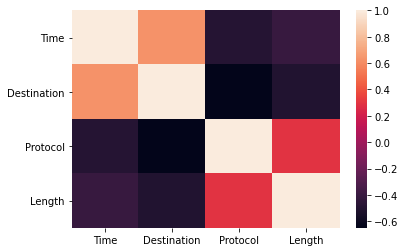

In [ ]:
# Plot heatmap of correlation between features
import seaborn as sns
sns.heatmap(data.corr())

Some feature pairs are almost zero correlation like time and destination. So lets apply PCA (Principle Component Analysis) to reduce the dimenionality and plot 3D graph of anomalies.

In [ ]:
pca = PCA(n_components=3)  # Reduce to 3 dimensions
sc = StandardScaler()
# Normalize the metrics
N = sc.fit_transform(data)
reduced = pca.fit_transform(N)

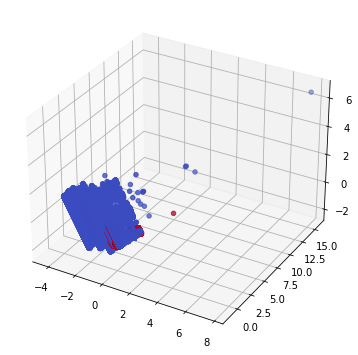

In [ ]:
from matplotlib import pyplot as plt
import numpy as np
plt.rcParams["figure.figsize"] = [10.00, 5.0]
plt.rcParams["figure.autolayout"] = True
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x = reduced[:, 0]
y = reduced[:, 1]
z = reduced[:, 2]
c = pred
img = ax.scatter(x, y, z, c=c, cmap='coolwarm')
plt.show()

# Test Dataset Preprocessing and Results

In [ ]:
# Show the contents of dataset
data_test.head(10)

,No.,Time,Source,Destination,Protocol,Length,Info
0,1,0.000000,10.42.33.5,10.42.33.255,BROWSER,243,"Host Announcement PROG-126, Workstation, Serve..."
1,2,0.034539,10.42.33.137,239.255.255.250,SSDP,215,M-SEARCH * HTTP/1.1
2,3,0.052717,10.42.33.3,224.0.0.102,HSRPv2,94,Hello (state Standby)
3,4,0.054607,10.42.33.2,224.0.0.102,HSRPv2,94,Hello (state Active)
4,5,0.126421,Apple_bd:a1:65,Broadcast,ARP,60,Who has 10.42.33.1? Tell 10.42.33.166
5,6,0.322672,Cisco_12:29:78,Broadcast,0x8899,60,Realtek Layer 2 Protocols
6,7,0.329250,10.42.33.2,224.0.0.102,HSRPv2,94,Hello (state Active)
7,8,0.331245,10.42.33.3,224.0.0.102,HSRPv2,94,Hello (state Standby)
8,9,0.353231,LiteON_52:e5:c3,Broadcast,ARP,60,Who has 10.42.33.210? Tell 10.42.33.125
9,10,0.486133,Dell_22:11:68,HewlettP_db:0a:2f,ARP,42,Who has 10.42.33.200? Tell 10.42.33.191


In [ ]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17420 entries, 0 to 17419
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   No.          17420 non-null  int64  
 1   Time         17420 non-null  float64
 2   Source       17420 non-null  object 
 3   Destination  17420 non-null  object 
 4   Protocol     17420 non-null  object 
 5   Length       17420 non-null  int64  
 6   Info         17339 non-null  object 
dtypes: float64(1), int64(2), object(4)
memory usage: 952.8+ KB


In [ ]:
data_test.head(20)

,No.,Time,Source,Destination,Protocol,Length,Info
0,1,0.000000,10.42.33.5,10.42.33.255,BROWSER,243,"Host Announcement PROG-126, Workstation, Serve..."
1,2,0.034539,10.42.33.137,239.255.255.250,SSDP,215,M-SEARCH * HTTP/1.1
2,3,0.052717,10.42.33.3,224.0.0.102,HSRPv2,94,Hello (state Standby)
3,4,0.054607,10.42.33.2,224.0.0.102,HSRPv2,94,Hello (state Active)
4,5,0.126421,Apple_bd:a1:65,Broadcast,ARP,60,Who has 10.42.33.1? Tell 10.42.33.166
5,6,0.322672,Cisco_12:29:78,Broadcast,0x8899,60,Realtek Layer 2 Protocols
6,7,0.329250,10.42.33.2,224.0.0.102,HSRPv2,94,Hello (state Active)
7,8,0.331245,10.42.33.3,224.0.0.102,HSRPv2,94,Hello (state Standby)
8,9,0.353231,LiteON_52:e5:c3,Broadcast,ARP,60,Who has 10.42.33.210? Tell 10.42.33.125
9,10,0.486133,Dell_22:11:68,HewlettP_db:0a:2f,ARP,42,Who has 10.42.33.200? Tell 10.42.33.191


In [ ]:
# Describe staticitics 
data_test.describe()

,No.,Time,Length
count,17420.00000,17420.000000,17420.000000
mean,8710.50000,53.660606,780.184099
std,5028.86518,19.943274,636.004351
min,1.00000,0.000000,42.000000
25%,4355.75000,41.820195,94.000000
50%,8710.50000,47.333288,1392.000000
75%,13065.25000,62.200132,1392.000000
max,17420.00000,109.605034,1814.000000


# Data preprocessing

In [ ]:
# Check for any missing values
data_test.isnull().values.any()

True

In [ ]:
# First columns just indicates the serial number of packets which has no significance. 
# Source IP column is not creating any difference because packets are being from the same source.
# Last column which shows Info is not required. So we would drop these columns.
data_test=data_test.drop(['No.','Source','Info'],axis=1)

In [ ]:
# Apply label encoding to categorical features
le = preprocessing.LabelEncoder()

data_test['Destination'] = le.fit_transform(data_test['Destination']) 
data_test['Protocol'] = le.fit_transform(data_test['Protocol'])

data_test.head()

,Time,Destination,Protocol,Length
0,0.000000,13,3,243
1,0.034539,123,21,215
2,0.052717,117,8,94
3,0.054607,117,8,94
4,0.126421,220,2,60


# Implement Machine Learning Algorithm 

In [ ]:
# Isolation Forest
ifc_test = IsolationForest(random_state=0)
ifc_test.fit(data_test)
pred_test = ifc.predict(data_test)

In [ ]:
print(pred_test)

[-1 -1 -1 ... -1 -1 -1]


# Results

In [ ]:
# Show total number of anomalies and normal points
outliers_test=0
inliers_test=0
for i in range(0,len(pred_test)):
    if pred_test[i]==-1:
        outliers_test+=1
    else:
        inliers_test+=1
print('Number of Anomalies = %d'%outliers_test)
print('Number of Inliers = %d'%inliers_test)

Number of Anomalies = 17293
Number of Inliers = 127


<AxesSubplot:>

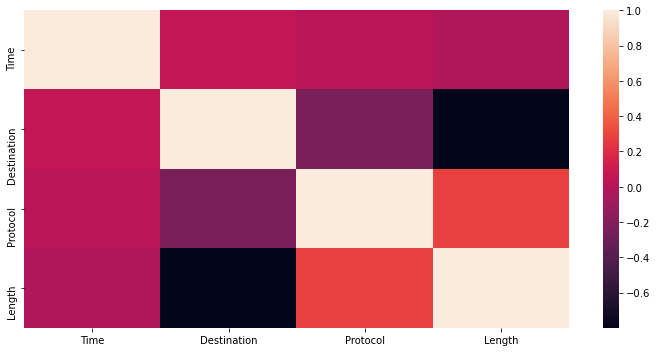

In [ ]:
# Plot heatmap of correlation between features
import seaborn as sns
sns.heatmap(data_test.corr())

Some feature pairs are almost zero correlation like time and destination. So lets apply PCA (Principle Component Analysis) to reduce the dimenionality and plot 3D graph of anomalies.

In [ ]:
pca = PCA(n_components=3)  # Reduce to 3 dimensions
sc = StandardScaler()
# Normalize the metrics
N = sc.fit_transform(data_test)
reduced = pca.fit_transform(N)

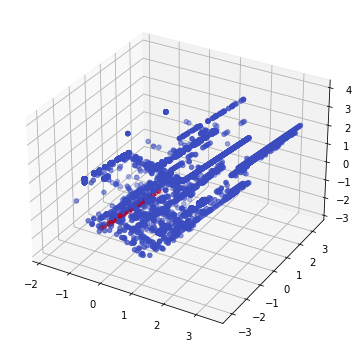

In [ ]:
from matplotlib import pyplot as plt
import numpy as np
plt.rcParams["figure.figsize"] = [10.00, 5.0]
plt.rcParams["figure.autolayout"] = True
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x = reduced[:, 0]
y = reduced[:, 1]
z = reduced[:, 2]
c = pred_test
img = ax.scatter(x, y, z, c=c, cmap='coolwarm')
plt.show()

So we can see that Isolation Forest has sucessfully detected the anomalies as shown by the red points in the above figure. Some are located on left side and some on lower side of projection.

# For Realtime packets monitoring


In [ ]:
#pip install scapy

In [ ]:
from scapy.all import *
for pkt in sniff(iface='eth1'):
    if IP in pkt and pkt[IP].src.endswith('5'):
        pkt[IP].dst = '1.1.1.1'
        sendp(pkt, iface='eth2')